Shane Ranasinghe 14233237

I will be using the dataset from Kaggle titled Netflix Movies and Tv shows found here:
https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows/code

To attempt to show the proficeincy I gained in python by applying some of the language skills i learnt in the course independantly on a chosen dataset of my own, as well as further exercise my skills in data exploration i learnt in modules 10 and 11.


## Importing Dataset and describing the data

In [2]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset, please upload the dataset included in the uploaded zip file to run this code
netflix = pd.read_csv('/content/netflix_titles.csv', encoding='iso-8859-1')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Shape of the data
netflix.shape

(8809, 26)

In [5]:
# Columns of the data
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [6]:
## The unnamed columns have no data values in the object, as such I will drop them from the netflix object
netflix.drop(columns=['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
                   'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
                   'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
                   'Unnamed: 24', 'Unnamed: 25'], inplace=True)

In [7]:
# New shape after dropping uneeded columns
netflix.shape

(8809, 12)

In [8]:
# Sample data row
netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [9]:
# Data description
netflix.describe(exclude='number').T

,count,unique,top,freq
show_id,8809,8809,s1,1
type,8809,2,Movie,6132
title,8809,8806,22-Jul,2
director,6175,4529,Rajiv Chilaka,19
cast,7984,7694,David Attenborough,19
country,7978,748,United States,2819
date_added,8799,1768,"January 1, 2020",109
rating,8805,18,TV-MA,3208
duration,8806,220,1 Season,1794
listed_in,8809,516,"Dramas, International Movies",362


## Preprocessing to fill in missing values

In [59]:
netflix.isnull().sum()/len(netflix)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.901237
cast             9.365422
country          9.433534
date_added       0.113520
release_year     0.000000
rating           0.045408
duration         0.034056
listed_in        0.000000
description      0.000000
dtype: float64

In [61]:
# As the there are a large number of missing data values in these three columns, only they will be filled, especially as the remiaing columns cannot be filled with accurate values
netflix['director'].fillna('Missing', inplace=True)
netflix['cast'].fillna('Missing', inplace=True)
netflix['country'].fillna('Missing', inplace=True)

In [62]:
netflix.isnull().sum()/len(netflix)*100

show_id         0.000000
type            0.000000
title           0.000000
director        0.000000
cast            0.000000
country         0.000000
date_added      0.113520
release_year    0.000000
rating          0.045408
duration        0.034056
listed_in       0.000000
description     0.000000
dtype: float64

In [63]:
# Splitting the netflix data set into movies and Tv shows
netflix_movies = netflix[netflix['type'] == 'Movie']
netflix_tv = netflix[netflix['type'] == 'TV Show']

## Exploration

In [64]:
# Sample data from the movies set
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Missing,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [65]:
# Sample data from TV dataset
netflix_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Missing,Missing,Missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Missing,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


To do some general data exploration we can look at the dataset as a whole and then seperated by the type of the content, meaning that well look at movie and TV-shows on netflix seperately as well

<ipython-input-66-5fcf71c9a274>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=netflix, palette = 'Set2')


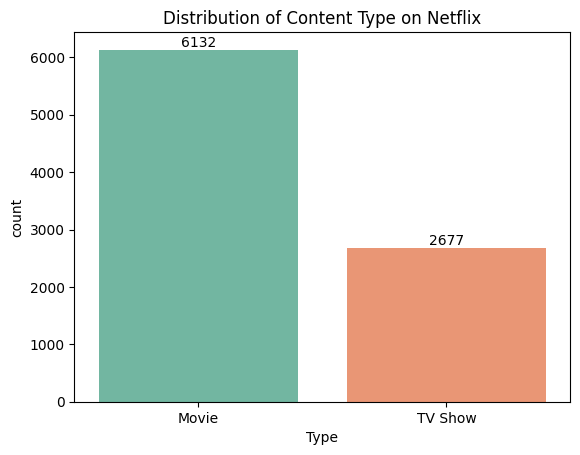

In [66]:
# Distribution of Content type
ax = sns.countplot(x='type', data=netflix, palette = 'Set2')
ax.set_title("Distribution of Content Type on Netflix")
ax.set_xlabel("Type")
for label in ax.containers:
    ax.bar_label(label)

<ipython-input-67-24c6adf6c979>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bx = sns.barplot(y=top_5.index, x= top_5.values, palette='Set2')


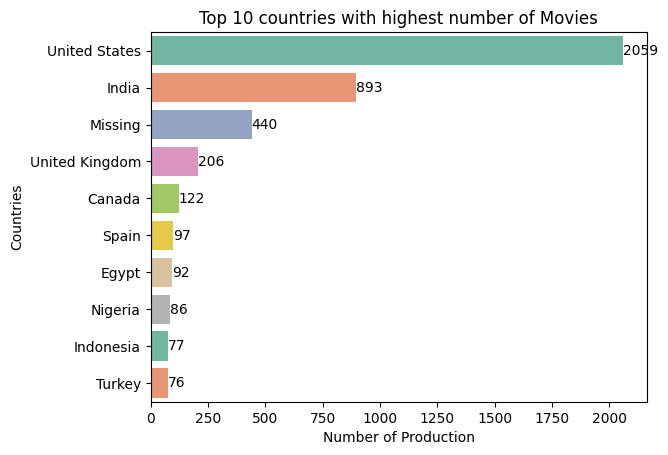

In [67]:
# Top countries by releases
top_5 = netflix_movies['country'].value_counts().head(10)
bx = sns.barplot(y=top_5.index, x= top_5.values, palette='Set2')
bx.figsize=(10,6)
bx.set_title("Top 10 countries with highest number of Movies")
bx.set_ylabel("Countries")
bx.set_xlabel("Number of Production")
for label in bx.containers:
    bx.bar_label(label)

Comparing the graphs for both movies and TV shows we can see that the US makes the most ammount of content in both categories,
with India second in movies followed by canada

<ipython-input-68-db5e6132fcd8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bx = sns.barplot(y=top_5.index, x= top_5.values, palette='Set2')


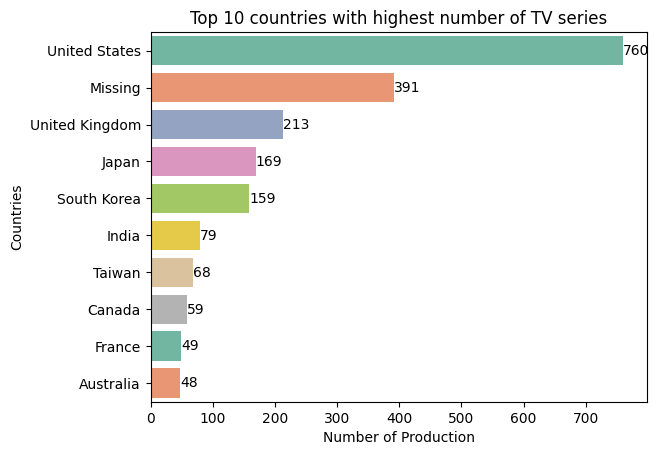

In [68]:
# Get the top 5 most frequent listings for Movie entries
top_5 = netflix_tv['country'].value_counts().head(10)
bx = sns.barplot(
    y=top_5.index,  # Set genre releases as labels on the y-axis
    x=top_5.values,  # Set counts of each release as values on the x-axis
    palette='Set2'
)
bx.figsize=(10,6)
bx.set_title("Top 10 countries with highest number of TV series")
bx.set_ylabel("Countries")
bx.set_xlabel("Number of Production")
for label in bx.containers:
    bx.bar_label(label)

In Terms of TV shows, countries like Japan which are not present in the movies graph are present here, this can tell us that maybe japanese producers and audiences prefer the TV show format and could be largely due to the large number of anime being produced in japan as well

<ipython-input-69-c82de7b716d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bx = sns.barplot(


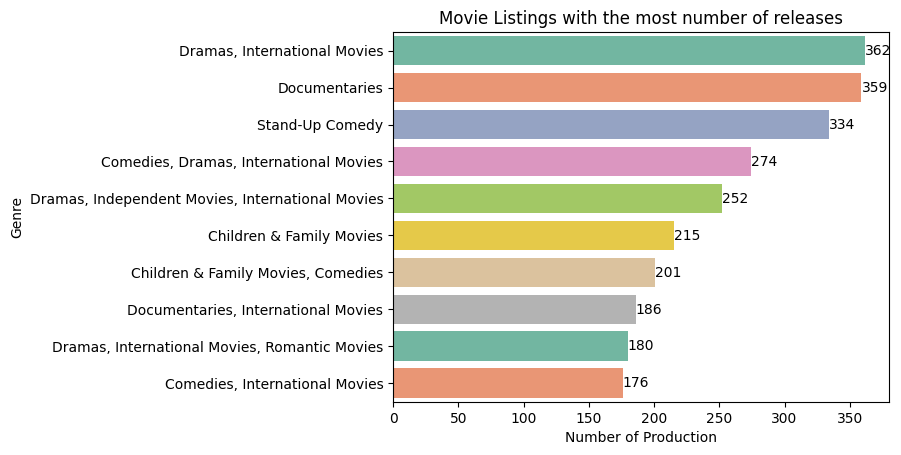

In [69]:
# Get the top 5 most frequent listings for Movie entries
top_5 = netflix_movies['listed_in'].value_counts().head(10)

bx = sns.barplot(
    y=top_5.index,  # Set genre releases as labels on the y-axis
    x=top_5.values,  # Set counts of each release as values on the x-axis
    palette='Set2'
)
bx.figsize=(10,6)
bx.set_title("Movie Listings with the most number of releases")
bx.set_ylabel("Genre")
bx.set_xlabel("Number of Production")
for label in bx.containers:
    bx.bar_label(label)

<ipython-input-70-2c6ce6503e5c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bx = sns.barplot(


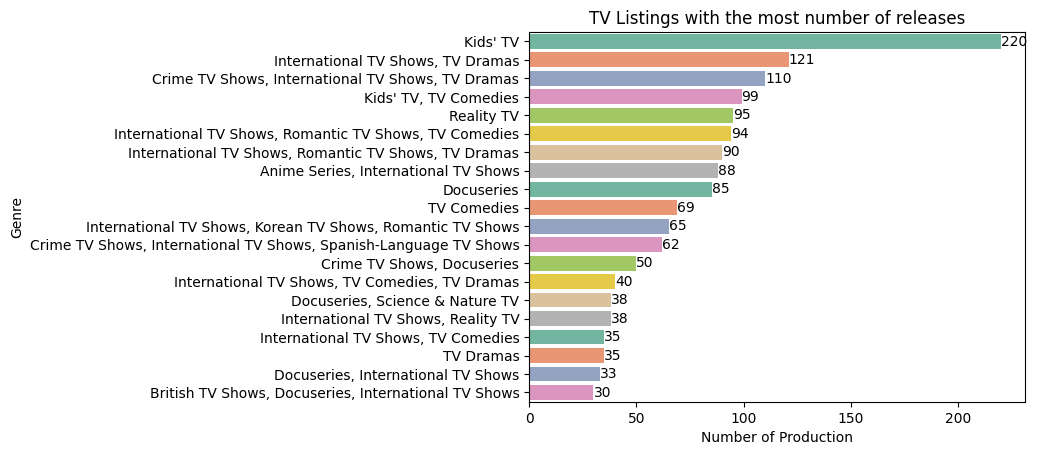

In [70]:
# Get the top 5 most frequent listings for TV show entries
top_5 = netflix_tv['listed_in'].value_counts().head(20)

bx = sns.barplot(
    y=top_5.index,  # Set genre releases as labels on the y-axis
    x=top_5.values,  # Set counts of each release as values on the x-axis
    palette='Set2'
)
bx.figsize=(10,6)
bx.set_title("TV Listings with the most number of releases")
bx.set_ylabel("Genre")
bx.set_xlabel("Number of Production")
for label in bx.containers:
    bx.bar_label(label)

<ipython-input-51-a33bb4e08f66>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bx = sns.barplot(


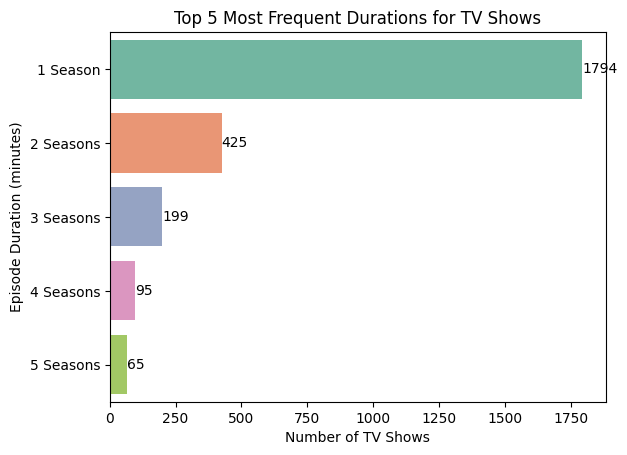

In [51]:
# Get the top 5 most frequent durations for TV show entries
top_5_durations = netflix_tv['duration'].value_counts().head(5)

bx = sns.barplot(
    y=top_5_durations.index,  # Set episode durations as labels on the y-axis
    x=top_5_durations.values,  # Set counts of each duration as values on the x-axis
    palette='Set2'
)

bx.figsize = (10, 6)
bx.set_title("Top 5 Most Frequent Durations for TV Shows")
bx.set_ylabel("Episode Duration (minutes)")
bx.set_xlabel("Number of TV Shows")
for label in bx.containers:
    bx.bar_label(label)


With further analysis and access to different data such as viewership numbers, we may be able to identify what aspects of a TV show prevent it from receiveing a second season, And using this information help write content that can be expanded into more seasons and generate more revenue

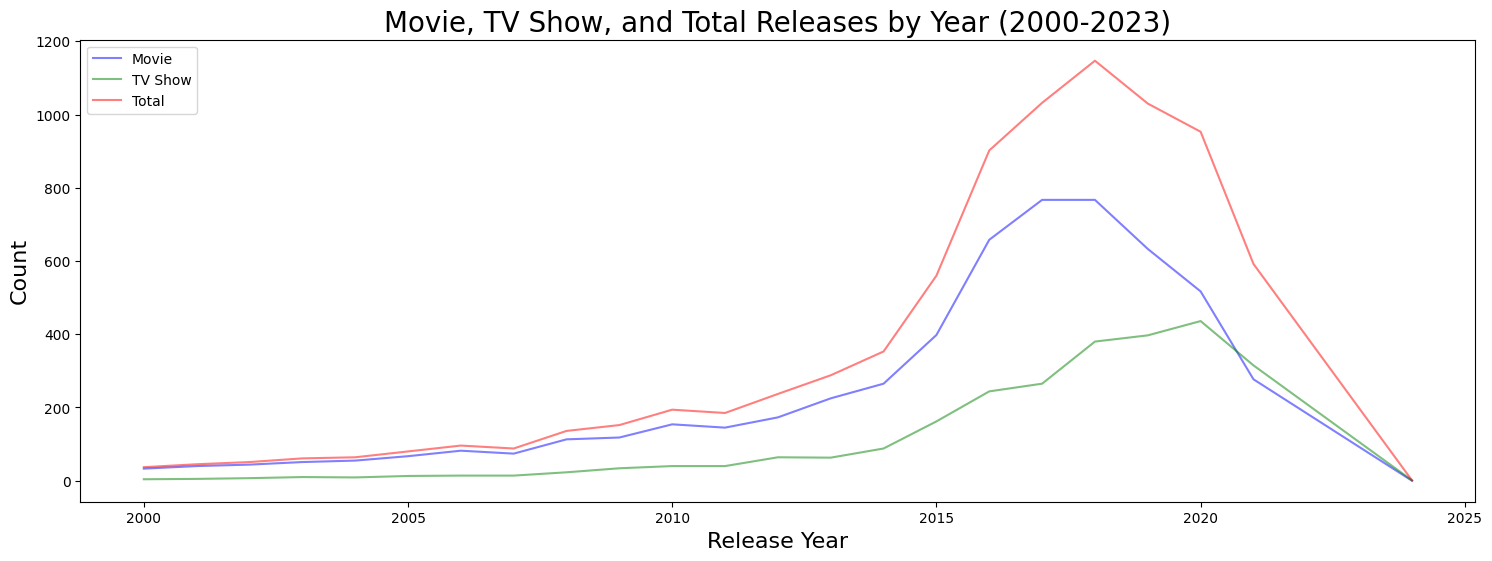

In [57]:
# Group data by release year and type
release_counts = netflix.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Add 'Total' column for combined counts
release_counts['Total'] = release_counts['Movie'] + release_counts['TV Show']

# Filter data for years 2000 to 2024 (inclusive)
filtered_years = release_counts.loc[(release_counts.index.get_level_values('release_year') >= 2000) & (release_counts.index.get_level_values('release_year') <= 2024)]


# Reset index to include 'release_year' as a column
content_by_release_year = filtered_years.reset_index()

# Create the plot
plt.figure(figsize=(18, 6))
plt.title('Movie, TV Show, and Total Releases by Year (2000-2024)', fontsize=20)
plt.plot(content_by_release_year['release_year'], content_by_release_year['Movie'], label='Movie', color='blue', alpha=0.5)
plt.plot(content_by_release_year['release_year'], content_by_release_year['TV Show'], label='TV Show', color='green', alpha=0.5)
plt.plot(content_by_release_year['release_year'], content_by_release_year['Total'], label='Total', color='red', alpha=0.5)
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(loc='upper left')

# Display the plot (optional)
plt.show()


Over all most of the releases Netflix has made have been movies, however very recently the production of movies has been declining and the amount of TV show releases overtook movie releases.

From the time this occured 2020-2024, we can say that this could be the effect of the worldwide quarantine due to the Covid-19 Pandemic, when consumtion of longfrom content like TV shows faced a dramtic rise in viewership.